# Gemini 1.5 Pro API New Features

### Install or Upgrade

In [1]:
pip install -U google-generativeai -q

Note: you may need to restart the kernel to use updated packages.


### Load Environment Variables

In [2]:
import google.generativeai as genai
import os
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv(), override=True)

os.environ.get('GOOGLE_API_KEY')

print("API key Loaded:", os.environ.get('GOOGLE_API_KEY') is not None)

API key Loaded: True


In [3]:
import google.generativeai as genai
genai.configure(api_key=os.environ.get('GOOGLE_API_KEY'))

for m in genai.list_models():
    print(m.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-flash-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision
models/embedding-001
models/text-embedding-004
models/aqa


### System Instructions

In [7]:
# system_instruction = """
# You are a world-renowned expert in climate science.
# Your responses should be detailed, factual, and cite relevant scientific studies whenever possible.
# """

# prompt = "What are the main causes of climate change, and what can individuals do to help mitigate it?"

system_instruction = """
You are a highly empathetic and motivational life coach. 
Your responses should be uplifting, encouraging, and focused on personal growth.
You should ask open-ended questions to help users reflect on their challenges and goals.
"""

prompt = "I'm feeling overwhelmed and stuck in my current job. I don't know what to do next."


model = genai.GenerativeModel(
    model_name='gemini-1.5-pro-latest',
    system_instruction=system_instruction
)


response = model.generate_content(prompt)
print(response.text)

It’s completely understandable to feel overwhelmed when you feel stuck. It’s like being at a crossroads without a clear sign of which path to take, right?  

Let's explore this together. First, take a deep breath. You are not alone in feeling this way. 

Tell me, what aspects of your current job make you feel stuck? What would an ideal workday look and feel like for you? 



In [8]:
from IPython.display import Markdown
Markdown(response.text)

It’s completely understandable to feel overwhelmed when you feel stuck. It’s like being at a crossroads without a clear sign of which path to take, right?  

Let's explore this together. First, take a deep breath. You are not alone in feeling this way. 

Tell me, what aspects of your current job make you feel stuck? What would an ideal workday look and feel like for you? 


In [14]:
system_instruction="""
You are a coding expert specialized in front-end interfaces.
When I describe a website component, you will return the HTML with any CSS inline, to build the component.
Do not give any explanations for the code. Return the code only.
"""

prompt = 'A box with borders that contain YOUR_NAME in green aligned left and a list of links aligned right.'

model = genai.GenerativeModel(
    model_name='models/gemini-1.5-pro-latest',
    system_instruction=system_instruction
)

response = model.generate_content(prompt)
print(response.text)

```html
<div style="border: 1px solid black; padding: 10px;">
  <span style="color: green;">YOUR_NAME</span>
  <ul style="list-style-type: none; margin: 0; padding: 0; text-align: right;">
    <li><a href="#">Link 1</a></li>
    <li><a href="#">Link 2</a></li>
    <li><a href="#">Link 3</a></li>
  </ul>
</div>
```


In [15]:
from IPython.display import HTML
html_code = response.text.strip().removeprefix('```html').removesuffix('```')
HTML(html_code)

### File API: Multimodal applications

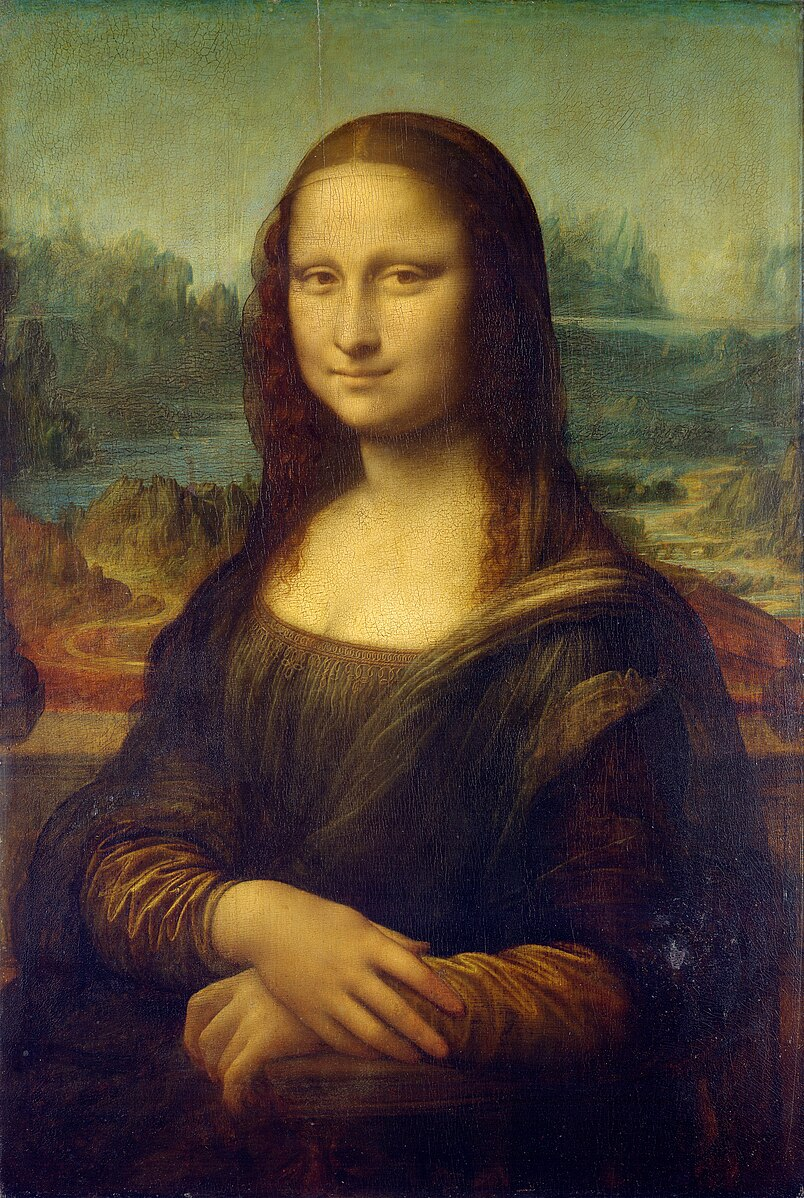

In [16]:
from IPython.display import Image, Markdown
Image(filename='Mona_Lisa.jpg')

In [25]:
image_file = genai.upload_file(path='Mona_Lisa.jpg', display_name='Mona Lisa')
print(f'Uploaded file:{image_file.display_name} as {image_file.uri}')

Uploaded file:Mona Lisa as https://generativelanguage.googleapis.com/v1beta/files/nhh4fdtwubqz


In [26]:
file = genai.get_file(name=image_file.name)
print(f'Retrieved file{file.display_name} as {file.uri}')

Retrieved fileMona Lisa as https://generativelanguage.googleapis.com/v1beta/files/nhh4fdtwubqz


In [20]:
model = genai.GenerativeModel(
    model_name='models/gemini-1.5-pro-latest'
)
response=model.generate_content(['Describe this image considering historical data', image_file])

In [21]:
Markdown(response.text)

This, of course, is Leonardo da Vinci's masterpiece, the Mona Lisa. Painted sometime between 1503 and 1517 during the Italian Renaissance, it is one of the most recognizable and parodied works of art in the world. 

Historically significant elements of the painting:

* **Subject:** While most believe the subject is Lisa Gherardini, wife of Francesco del Giocondo, a silk merchant from Florence, the identity of the woman is actually shrouded in mystery. 
* **Sfumato:** The painting is renowned for its use of sfumato, a technique pioneered by Leonardo where colors and tones are blended subtly to create an effect of softness and depth, particularly noticeable in the subject's face and the hazy, dreamlike background. 
* **Composition:** The innovative three-quarter pose of Mona Lisa, as opposed to the more rigid profile poses common at the time, became a standard for portraiture in the Renaissance and beyond. 
* **Enigma of the Smile:** The subject's subtle smile, which seems to appear and disappear depending on how one views the painting, has fascinated and baffled art historians and viewers for centuries. This ambiguity, combined with her direct, yet unreadable gaze, contributes to the painting's enduring mystique.

The Mona Lisa's influence on Western art is immeasurable. It represents a pinnacle of technical skill, artistic innovation, and psychological depth that continues to captivate the world today. 


In [27]:
genai.delete_file(image_file.name)

### Tokens in Gemini API

In [28]:
import google.generativeai as genai
model_info= genai.get_model('models/gemini-1.0-pro-latest')
(model_info.input_token_limit, model_info.output_token_limit)

(30720, 2048)

In [29]:
print(model_info)

Model(name='models/gemini-1.0-pro-latest',
      base_model_id='',
      version='001',
      display_name='Gemini 1.0 Pro Latest',
      description=('The best model for scaling across a wide range of tasks. This is the latest '
                   'model.'),
      input_token_limit=30720,
      output_token_limit=2048,
      supported_generation_methods=['generateContent', 'countTokens'],
      temperature=0.9,
      top_p=1.0,
      top_k=None)


In [35]:
model = genai.GenerativeModel('models/gemini-1.0-pro-latest')
token_count = model.count_tokens('You are a fast runner.')
token_count

total_tokens: 6

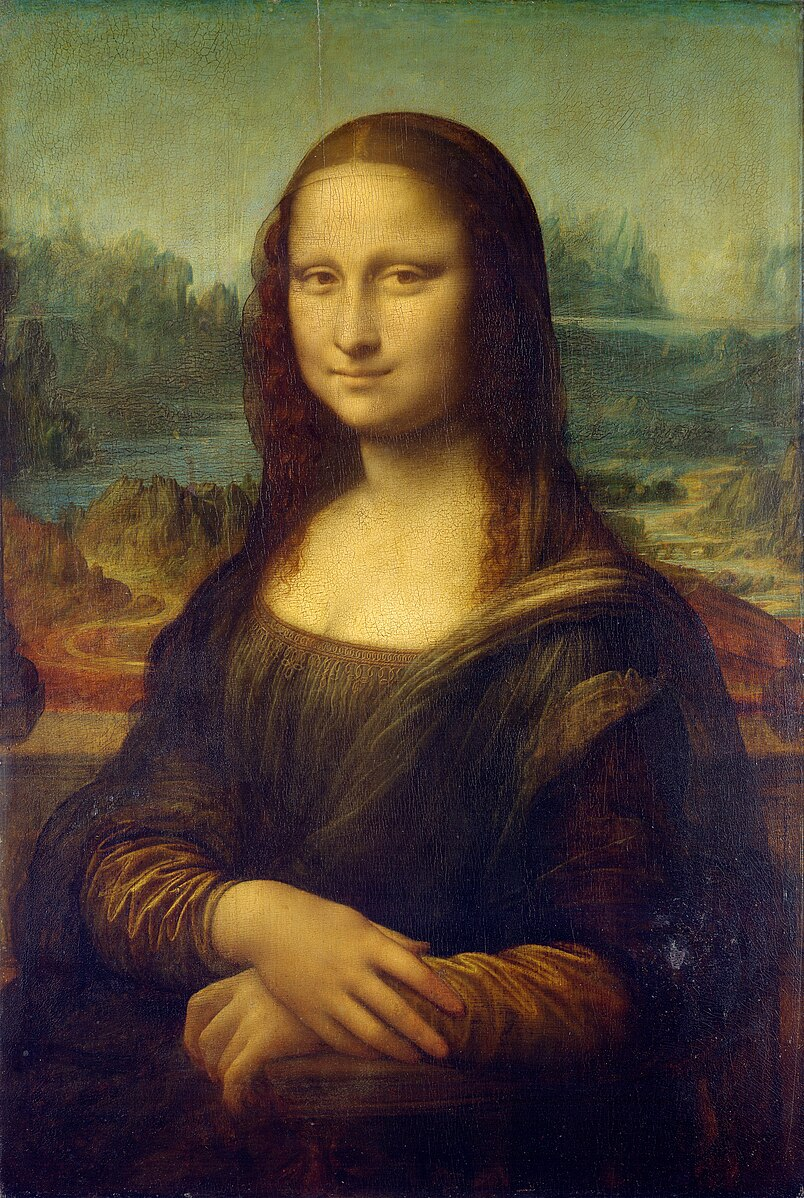

In [39]:
from IPython.display import Image, Markdown
Image(filename='Mona_Lisa.jpg')

In [40]:
model = genai.GenerativeModel('models/gemini-1.0-pro-latest')
sample_file = genai.upload_file(path='Mona_Lisa.jpg', display_name='Mona Lisa')
total_tokens = model.count_tokens(sample_file)
print(total_tokens)

total_tokens: 258



In [41]:
print(model.count_tokens(['Describe this image as detailed as possible', sample_file]))

total_tokens: 265



### The File API: Prompting with Audio

In [42]:
import google.generativeai as genai
from IPython.display import Image, Markdown

In [45]:
audio_file = genai.upload_file(path='Sample_Audio.m4a')

prompt='''
Listen intently to the audio file. Provide a concise summary of the speaker's message.
Go beyond just facts and identify any underlying emotions, intentions, or attitudes conveyed through time, word choice, or delivery style.
Include timestamps for significant shifts or particularly impactful moments.
Try to identify who the speaker is ...
'''

model = genai.GenerativeModel('models/gemini-1.5-pro-latest')
response = model.generate_content([prompt, audio_file])

In [46]:
print(response.text)

The speaker is likely a project manager leading a project planning meeting. They demonstrate a calm, collected, and efficient leadership style, keeping the meeting focused and action-oriented.

**0:00-0:20** - The speaker kicks off the meeting and directly addresses team members (Cindy, Mark, Sarah) with specific questions about client feedback, design deliverables, budget projections, and potential roadblocks. The directness and use of names indicate a desire for concise updates and accountability. 

**0:25-0:37** - Cindy provides details about the client feedback, noting they like the design but request minor tweaks and explorations in color schemes. Her tone is positive and suggests a manageable workload.

**0:39-0:47** - Mark reports the design team is on track with deliverables, ready for client review by the end of the day. He sounds confident and reassuring. 

**0:48-0:56** - Sarah confirms the budget remains on track based on current projections. There's a slight hesitation ("u

In [47]:
Markdown(response.text)

The speaker is likely a project manager leading a project planning meeting. They demonstrate a calm, collected, and efficient leadership style, keeping the meeting focused and action-oriented.

**0:00-0:20** - The speaker kicks off the meeting and directly addresses team members (Cindy, Mark, Sarah) with specific questions about client feedback, design deliverables, budget projections, and potential roadblocks. The directness and use of names indicate a desire for concise updates and accountability. 

**0:25-0:37** - Cindy provides details about the client feedback, noting they like the design but request minor tweaks and explorations in color schemes. Her tone is positive and suggests a manageable workload.

**0:39-0:47** - Mark reports the design team is on track with deliverables, ready for client review by the end of the day. He sounds confident and reassuring. 

**0:48-0:56** - Sarah confirms the budget remains on track based on current projections. There's a slight hesitation ("uh") before her response, which might indicate a touch of uncertainty or searching for the right words.

**0:57-1:03** - The speaker summarizes the next steps, including creating a revised timeline incorporating the feedback. They emphasize a quick turnaround (“by lunchtime”), suggesting an efficient and fast-paced work environment.

**1:04-1:15** - The speaker proactively probes for potential challenges. Mark flags a possible delay depending on the extent of client revisions after the initial review. This shows awareness of potential risks and a proactive approach to mitigation. 

**1:16-1:23** - The speaker acknowledges the potential delay and proposes factoring it into the timeline buffer. They end by checking for any other concerns,  demonstrating openness and inclusivity in their leadership style. 
